## Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [1]:
#Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats

import env as e
import wrangle as w
import model as m
import explore as ex

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = w.get_zillow_data()

In [3]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [4]:
#Clean the zillow data
df = w.clean_zillow(df)

In [5]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
4,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles,12
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6


In [6]:
#Remove outliers
df = w.remove_outliers(df,['bedrooms','bathrooms','square_feet','tax_value','tax_amount'])

In [7]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6
7,3,2.0,2077,646760,1926,7924.68,6037,Los Angeles,91


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     int64  
 1   bathrooms    float64
 2   square_feet  int64  
 3   tax_value    int64  
 4   year_built   int64  
 5   tax_amount   float64
 6   fips         int64  
 7   county       object 
 8   home_age     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 141.5+ MB


### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [9]:
#Split data with function from wrangle
train, validate, test = w.train_validate_test_split(df)

In [10]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1560492,3,2.0,1284,78502,1964,743.78,6059,Orange,53
453041,4,2.0,1694,341772,1961,3609.74,6111,Ventura,56


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
#Taking a sample to help speed up visualizations
sample = train.sample(frac=0.10)
print(len(sample))

129795


In [12]:
def plot_variable_pair(df):
    columns = df.columns.to_list()
    for i, col in enumerate(columns):
        sns.lmplot(data=df, x=col, y='tax_value', line_kws={'color':'red'})
        plt.show()

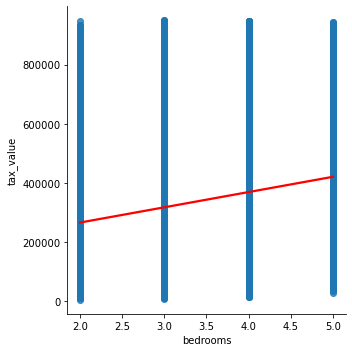

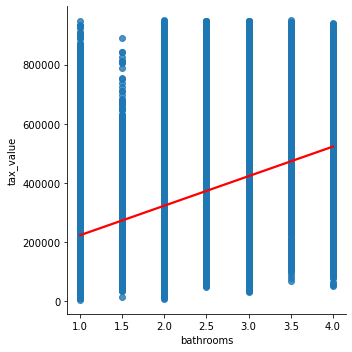

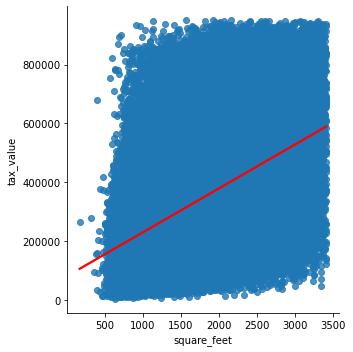

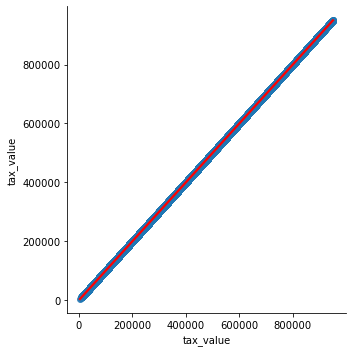

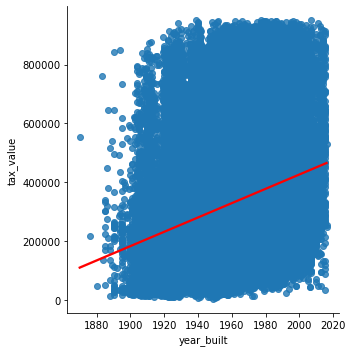

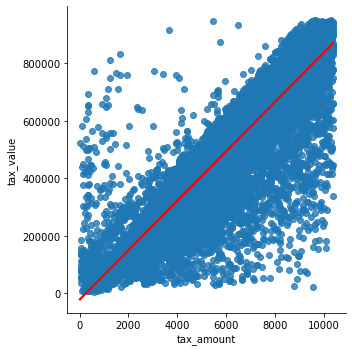

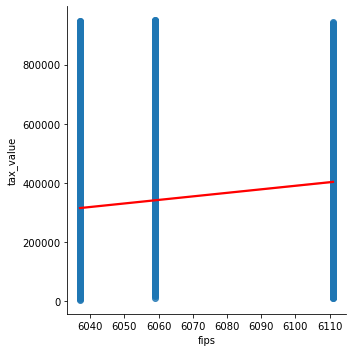

ValueError: could not convert string to float: 'Los Angeles'

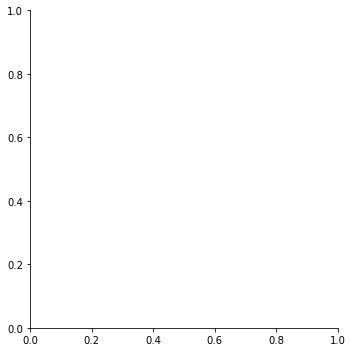

In [13]:
plot_variable_pair(sample)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [14]:
cat_vars = ['bedrooms', 'bathrooms', 'home_age', 'county']
cont_vars = ['square_feet', 'tax_value', 'tax_amount']

In [15]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

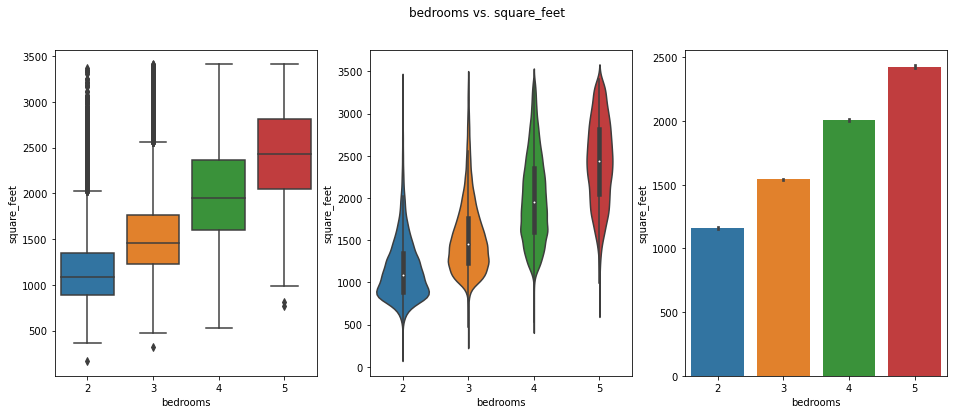

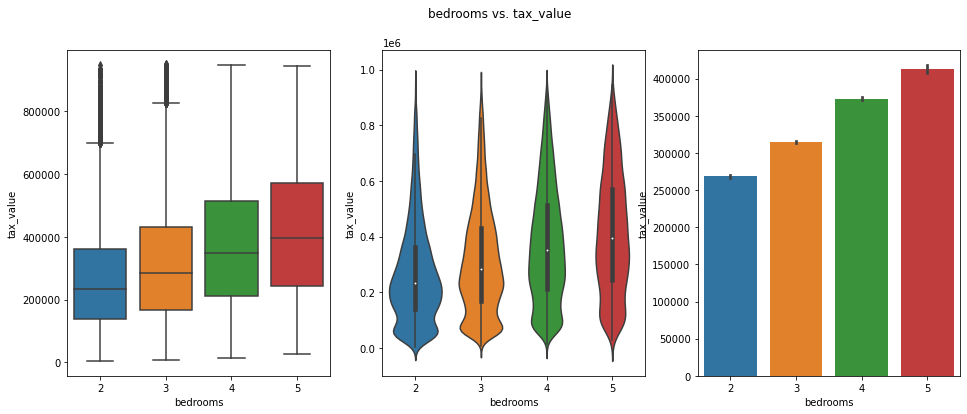

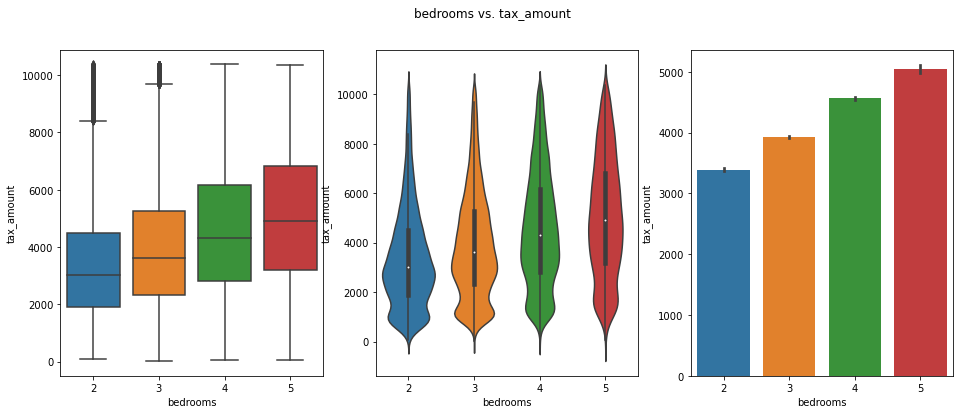

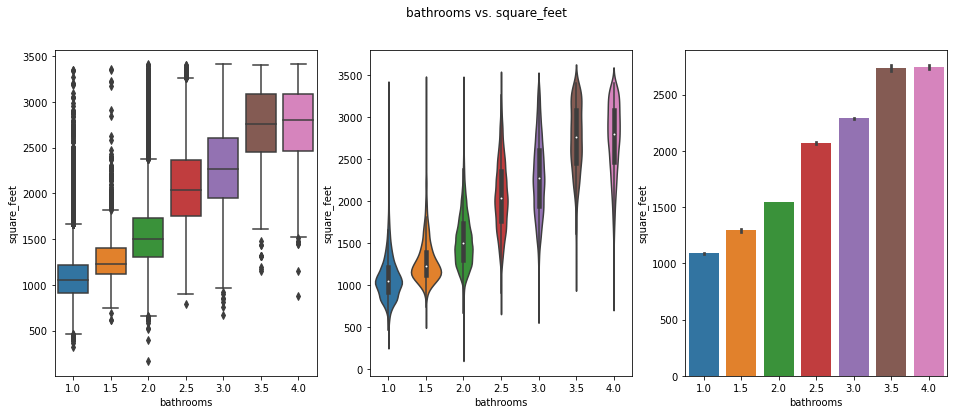

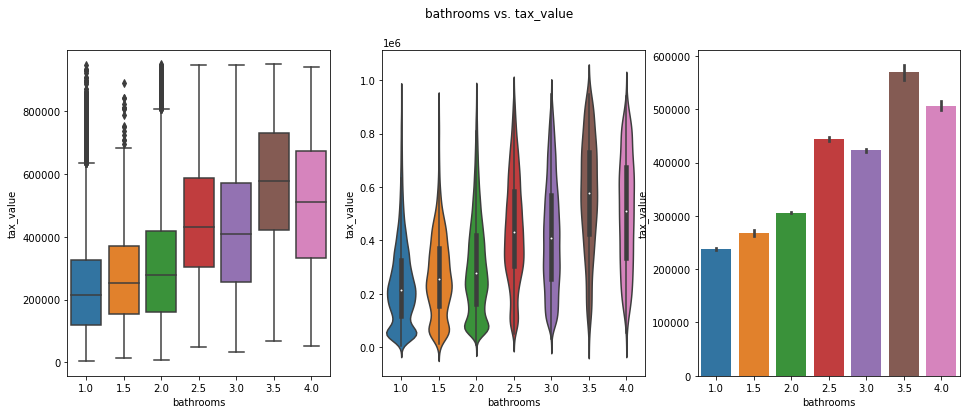

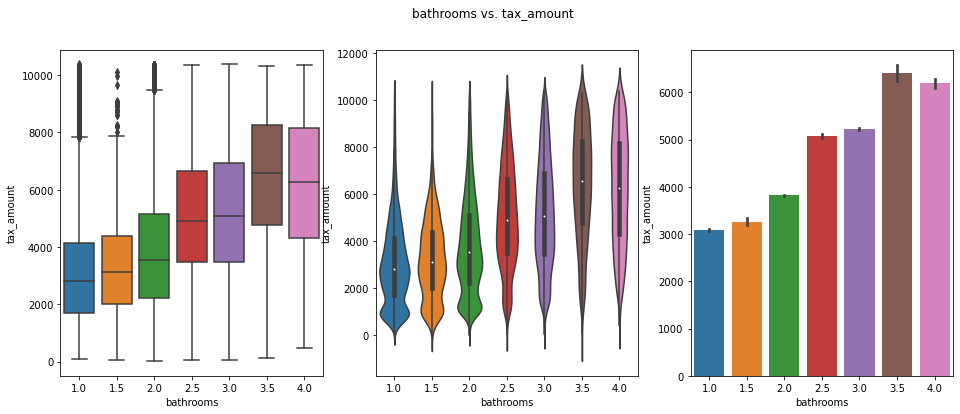

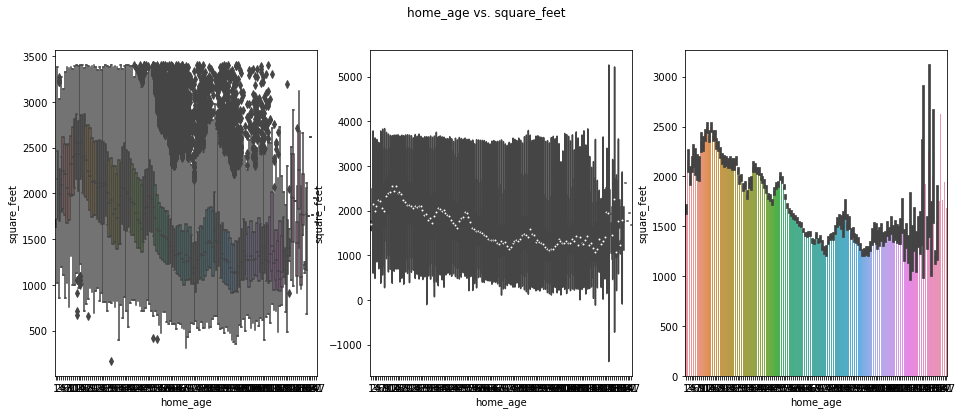

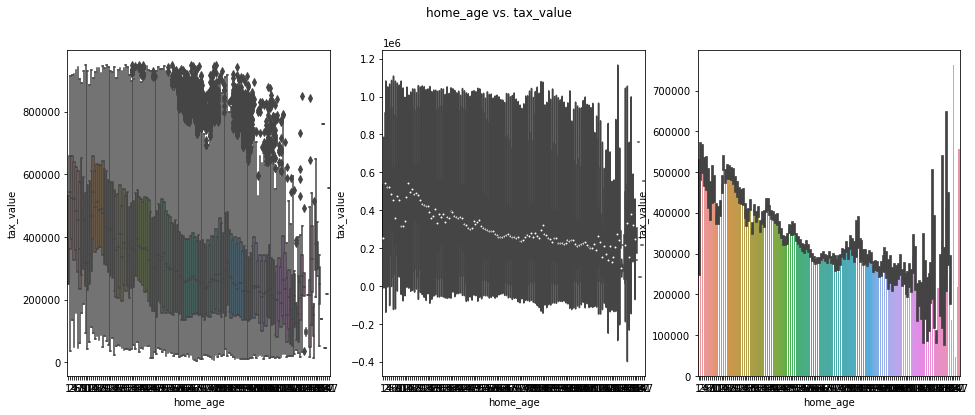

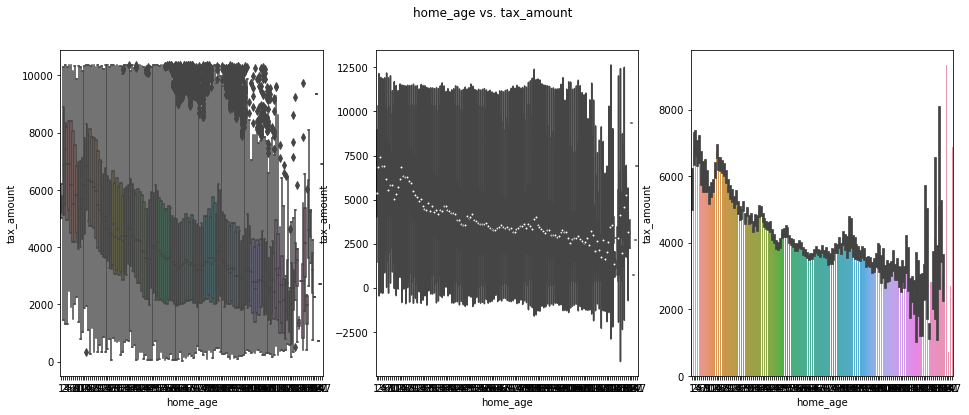

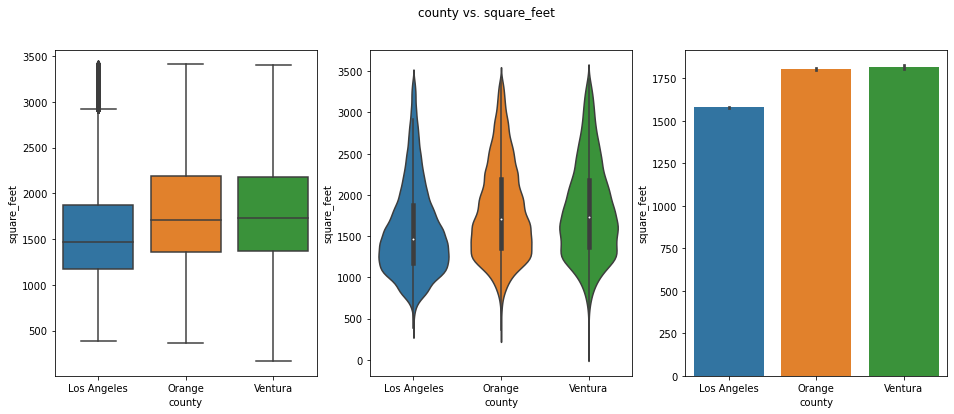

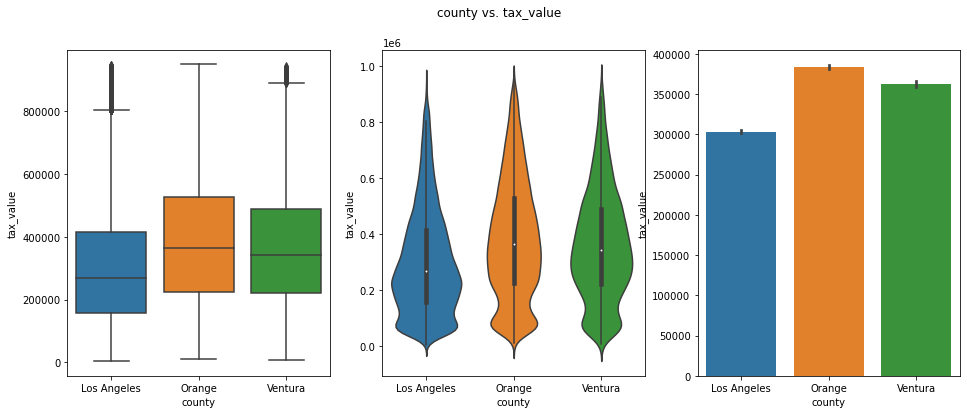

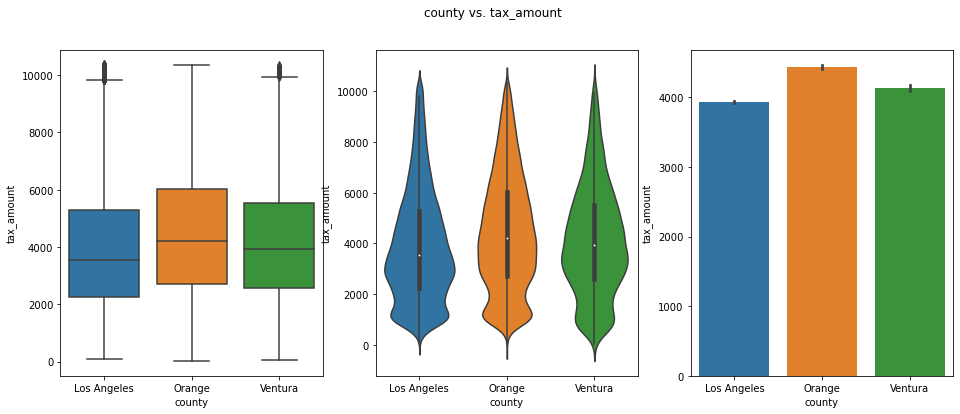

In [16]:
ex.plot_categorical_and_continuous_vars(sample, cat_vars, cont_vars)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
#See explore.py file

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [ ]:
#See Code Below

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

### 8.  Visualize all combinations of variables in some way.

### 9. Run the appropriate statistical tests where needed.

### 10. What independent variables are correlated with the dependent variable, home value?

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152863
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     int64  
 1   bathrooms    float64
 2   square_feet  int64  
 3   tax_value    int64  
 4   year_built   int64  
 5   tax_amount   float64
 6   fips         int64  
 7   county       object 
 8   home_age     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 141.5+ MB


In [18]:
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
6,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles,6
7,3,2.0,2077,646760,1926,7924.68,6037,Los Angeles,91


In [ ]:
#Create column for home age using year_built
#train['home_age'] = 2017- train.year_built

## Categorical variable exploration

bedrooms
3    633211
4    377678
2    224540
5     62524
Name: bedrooms, dtype: int64
3    48.785357
4    29.097972
2    17.299548
5     4.817124
Name: bedrooms, dtype: float64


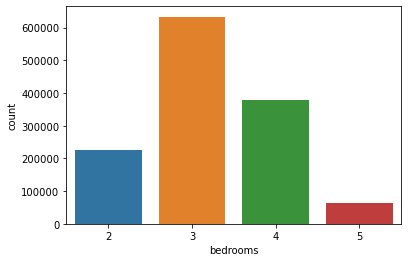

bathrooms
2.0    637039
1.0    270012
3.0    245899
2.5     92529
4.0     22364
1.5     21529
3.5      8581
Name: bathrooms, dtype: int64
2.0    49.080283
1.0    20.802910
3.0    18.945139
2.5     7.128841
4.0     1.723021
1.5     1.658689
3.5     0.661118
Name: bathrooms, dtype: float64


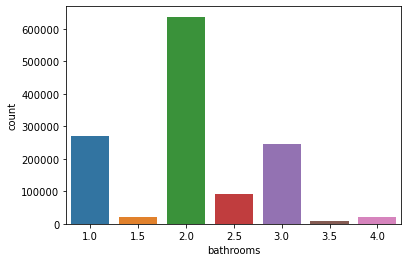

home_age
62     56310
67     46928
63     45805
64     41228
61     40735
       ...  
194        1
136        1
143        1
205        1
216        1
Name: home_age, Length: 151, dtype: int64
62     4.338370
67     3.615539
63     3.529018
64     3.176386
61     3.138403
         ...   
194    0.000077
136    0.000077
143    0.000077
205    0.000077
216    0.000077
Name: home_age, Length: 151, dtype: float64


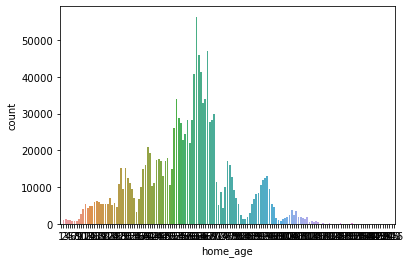

county
Los Angeles    869267
Orange         327402
Ventura        101284
Name: county, dtype: int64
Los Angeles    66.972148
Orange         25.224488
Ventura         7.803364
Name: county, dtype: float64


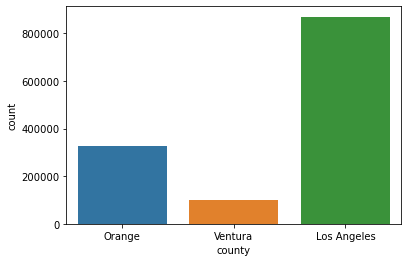

In [19]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Bedrooms

In [20]:
#Value Counts of bedrooms in training data set
train.bedrooms.value_counts()

3    633211
4    377678
2    224540
5     62524
Name: bedrooms, dtype: int64

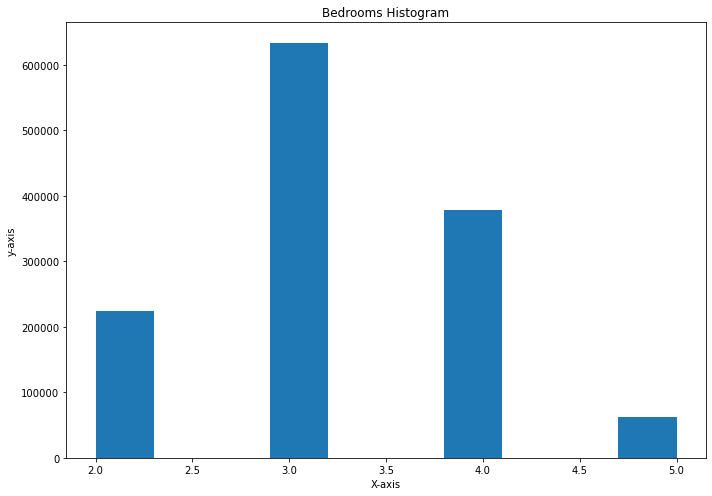

In [21]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bedrooms)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bedrooms Histogram')
 
# Show plot
plt.show()

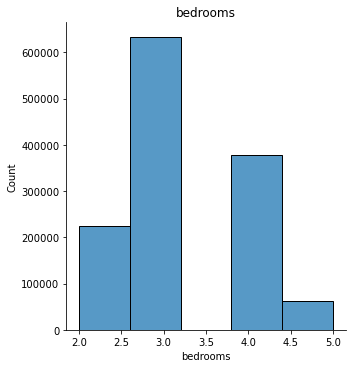

In [22]:
#Displot
sns.displot(x='bedrooms', data=train, bins=5)
plt.title('bedrooms')
plt.show()

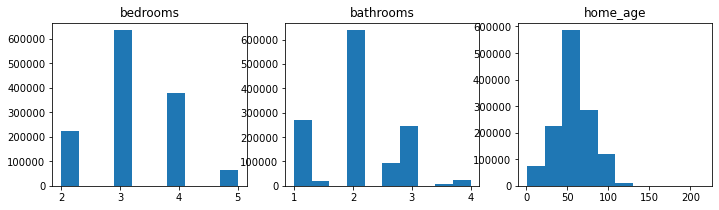

In [23]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'home_age']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

In [24]:
#Descriptive statistics
print(f'Mean bedrooms = {train.bedrooms.mean()}')
print(f'Median Bedrooms = {train.bedrooms.median()}')
print(f'Mode Bedrooms = {train.bedrooms.mode()}')
print(f'Max Bedrooms = {train.bedrooms.max()}')
print(f'Min Bedrooms = {train.bedrooms.min()}')

Mean bedrooms = 3.214326712908711
Median Bedrooms = 3.0
Mode Bedrooms = 0    3
Name: bedrooms, dtype: int64
Max Bedrooms = 5
Min Bedrooms = 2


### Bathrooms

In [25]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1560492,3,2.0,1284,78502,1964,743.78,6059,Orange,53
453041,4,2.0,1694,341772,1961,3609.74,6111,Ventura,56


In [26]:
#Bathrooms in train data set
train.bathrooms.value_counts()

2.0    637039
1.0    270012
3.0    245899
2.5     92529
4.0     22364
1.5     21529
3.5      8581
Name: bathrooms, dtype: int64

In [27]:
#Descriptive statistics of bathrooms
print(f'Mean Bathrooms = {train.bathrooms.mean()}')
print(f'Median Bathrooms = {train.bathrooms.median()}')
print(f'Mode Bathrooms = {train.bathrooms.mode()}')
print(f'Max Bathrooms = {train.bathrooms.max()}')
print(f'Min Bathrooms = {train.bathrooms.min()}')

Mean Bathrooms = 2.053150229630811
Median Bathrooms = 2.0
Mode Bathrooms = 0    2.0
Name: bathrooms, dtype: float64
Max Bathrooms = 4.0
Min Bathrooms = 1.0


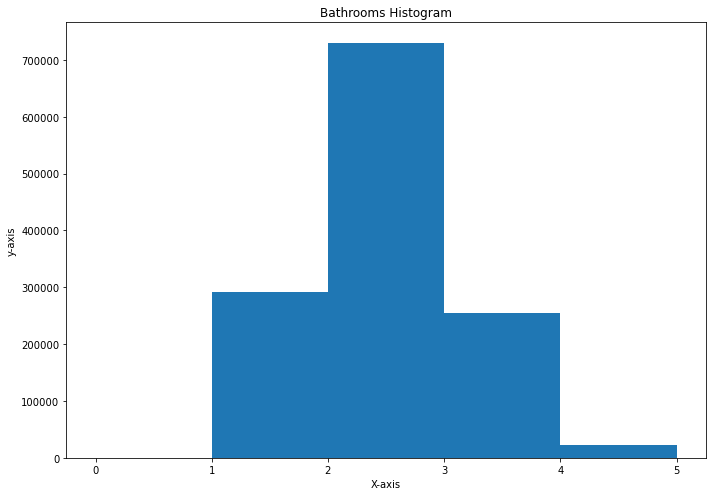

In [28]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bathrooms, bins = [0, 1,2,3,4,5])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bathrooms Histogram')
 
# Show plot
plt.show()

#### Appears to be normally distributed

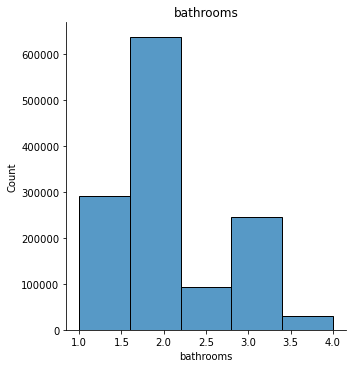

In [29]:
#Displot
sns.displot(x='bathrooms', data=train, bins=5)
plt.title('bathrooms')
plt.show()

### Home_age

In [30]:
#Age of homes in dataset
train.home_age.value_counts()

62     56310
67     46928
63     45805
64     41228
61     40735
       ...  
194        1
136        1
143        1
205        1
216        1
Name: home_age, Length: 151, dtype: int64

In [31]:
#Descriptive statistics
print(f'Mean Home Age = {train.home_age.mean()}')
print(f'Median Home Age = {train.home_age.median()}')
print(f'Mode Home Age = {train.home_age.mode()}')
print(f'Max Home Age = {train.home_age.max()}')
print(f'Min Home Age = {train.home_age.min()}')

Mean Home Age = 57.5710437897212
Median Home Age = 60.0
Mode Home Age = 0    62
Name: home_age, dtype: int64
Max Home Age = 216
Min Home Age = 1


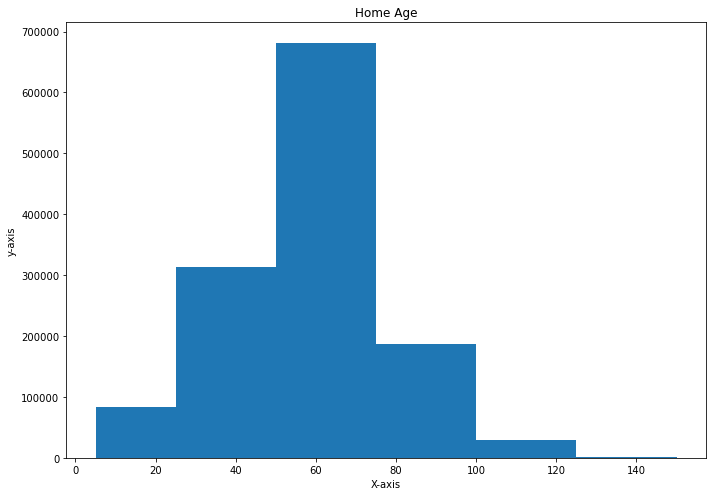

In [32]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.home_age, bins = [5, 25, 50, 75, 100, 125, 150])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Home Age')
 
# Show plot
plt.show()

#### Again, appears to be normally distributed

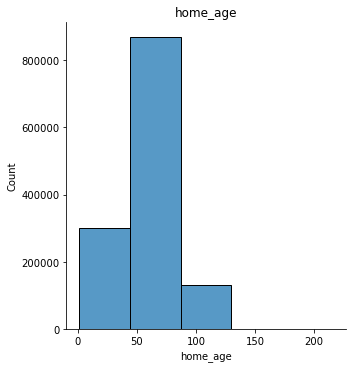

In [33]:
#Displot
sns.displot(x='home_age', data=train, bins=5)
plt.title('home_age')
plt.show()

### County

In [34]:
#Value counts of county
train.county.value_counts()

Los Angeles    869267
Orange         327402
Ventura        101284
Name: county, dtype: int64

In [ ]:
### FIPS--labeling fips--placed into clean file
    ##zillow['fips'] = zillow.fips.astype(int)
    ##zillow['fips_loc'] = zillow.fips.replace({6037:'Los Angeles, CA',
                       ##6059:'Orange, CA',
                       ##6111:'Ventura, CA'})

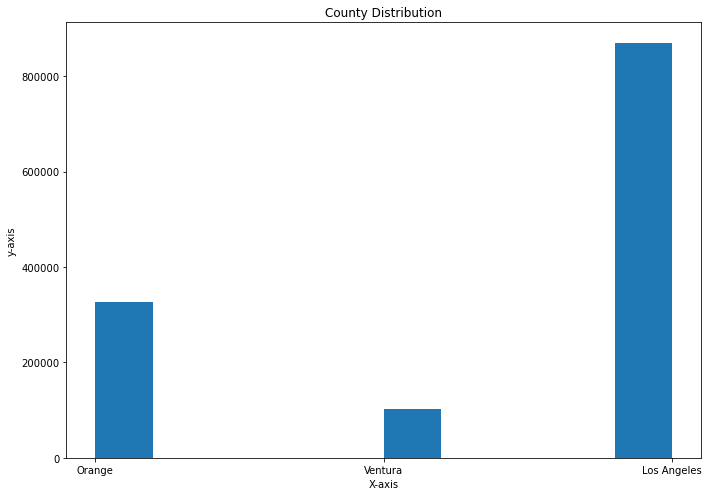

In [35]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.county)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('County Distribution')
 
# Show plot
plt.show()

## Univariate Exploration of Continuous Variables

In [36]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1560492,3,2.0,1284,78502,1964,743.78,6059,Orange,53
453041,4,2.0,1694,341772,1961,3609.74,6111,Ventura,56


In [37]:
num_vars = ['square_feet', 'tax_value', 'tax_amount', 'home_age']
cat_vars = ['bedrooms', 'bathrooms', 'county']

Mean square_feet is: 1653.0953670895633


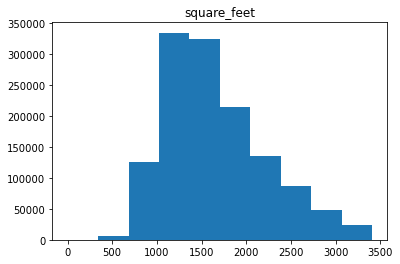

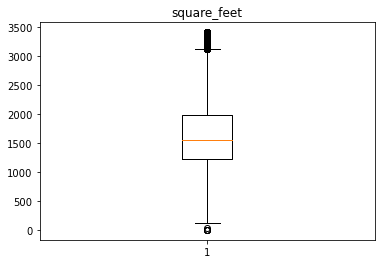

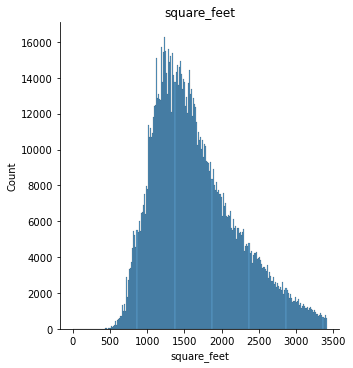

Mean tax_value is: 327806.6678038419


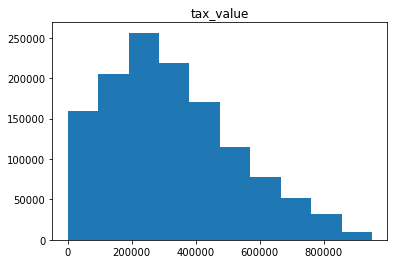

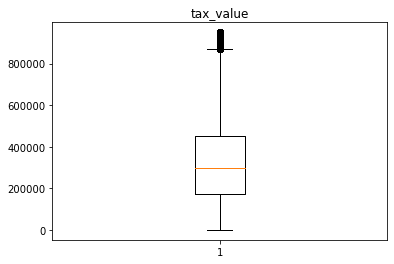

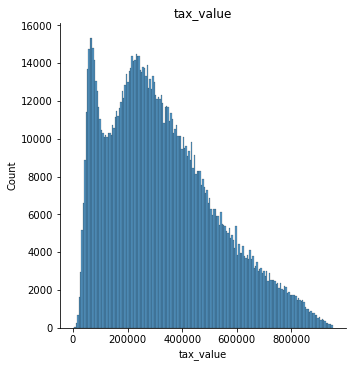

Mean tax_amount is: 4067.901726649461


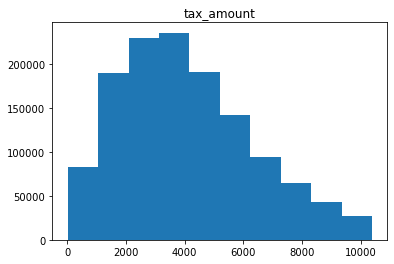

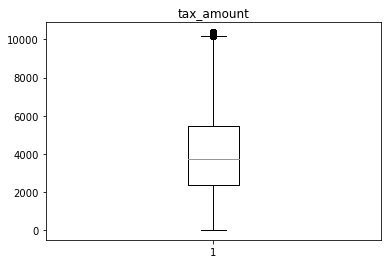

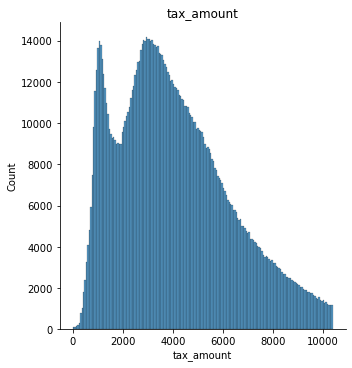

Mean home_age is: 57.5710437897212


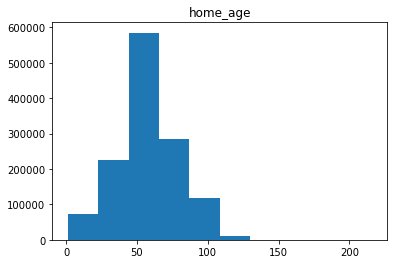

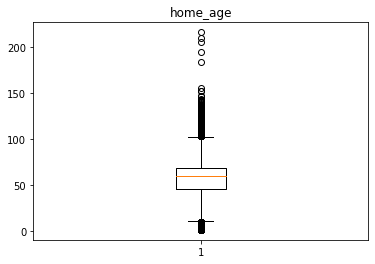

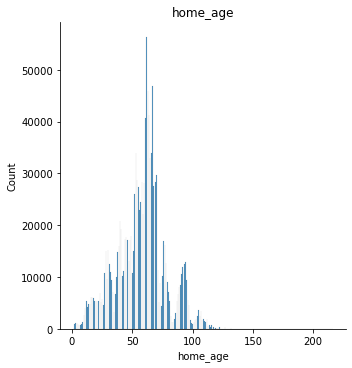

In [38]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    print(f'Mean {col} is: {train[col].mean()}')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    sns.displot(train[col])
    plt.title(col)
    plt.show()

### Square Footage

In [39]:
#Descriptive statistics
print(f'Mean Square Feet = {train.square_feet.mean()}')
print(f'Median Square Feet = {train.square_feet.median()}')
print(f'Mode Square Feet = {train.square_feet.mode()}')
print(f'Max Square Feet = {train.square_feet.max()}')
print(f'Min Square Feet = {train.square_feet.min()}')

Mean Square Feet = 1653.0953670895633
Median Square Feet = 1547.0
Mode Square Feet = 0    1200
Name: square_feet, dtype: int64
Max Square Feet = 3408
Min Square Feet = 1


### Tax Value (Price)

In [40]:
train.tax_value.mean()

327806.6678038419

In [41]:
train.groupby('bedrooms').tax_value.mean()

bedrooms
2    268716.084252
3    314383.752500
4    371477.328955
5    412162.903669
Name: tax_value, dtype: float64

In [42]:
#Descriptive statistics
print(f'Mean Tax Value = {train.tax_value.mean()}')
print(f'Median Tax Value = {train.tax_value.median()}')
print(f'Mode Tax Value = {train.tax_value.mode()}')
print(f'Max Tax Value = {train.tax_value.max()}')
print(f'Min Tax Value = {train.tax_value.min()}')

Mean Tax Value = 327806.6678038419
Median Tax Value = 296465.0
Mode Tax Value = 0    450000
Name: tax_value, dtype: int64
Max Tax Value = 950835
Min Tax Value = 22


### Tax Amount

In [43]:
#Descriptive statistics
print(f'Mean Tax Amount = {train.tax_amount.mean()}')
print(f'Median Tax Amount = {train.tax_amount.median()}')
print(f'Mode Tax Amount = {train.tax_amount.mode()}')
print(f'Max Tax Amount = {train.tax_amount.max()}')
print(f'Min Tax Amount = {train.tax_amount.min()}')

Mean Tax Amount = 4067.901726649461
Median Tax Amount = 3744.94
Mode Tax Amount = 0    345.72
Name: tax_amount, dtype: float64
Max Tax Amount = 10376.99
Min Tax Amount = 16.48


## Multivariate Analysis

In [44]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1560492,3,2.0,1284,78502,1964,743.78,6059,Orange,53
453041,4,2.0,1694,341772,1961,3609.74,6111,Ventura,56


In [45]:
# create the correlation matrix using pandas .corr()
#Drop columns not needed for this
zillow_corr = sample.drop(columns=['year_built', 'county']).corr(method='spearman')

In [46]:
zillow_corr

,bedrooms,bathrooms,square_feet,tax_value,tax_amount,fips,home_age
bedrooms,1.000000,0.577529,0.605312,0.201974,0.202143,0.195642,-0.415760
bathrooms,0.577529,1.000000,0.777032,0.355054,0.351879,0.206181,-0.574608
square_feet,0.605312,0.777032,1.000000,0.392054,0.386845,0.199136,-0.496390
tax_value,0.201974,0.355054,0.392054,1.000000,0.972195,0.171628,-0.246396
tax_amount,0.202143,0.351879,0.386845,0.972195,1.000000,0.092368,-0.240686
fips,0.195642,0.206181,0.199136,0.171628,0.092368,1.000000,-0.414417
home_age,-0.415760,-0.574608,-0.496390,-0.246396,-0.240686,-0.414417,1.000000


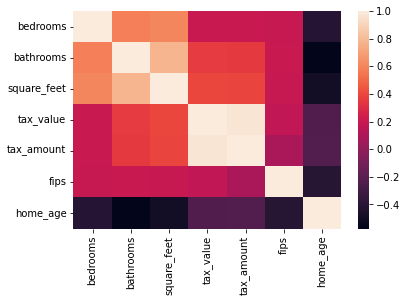

In [47]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zillow_corr)
plt.show()

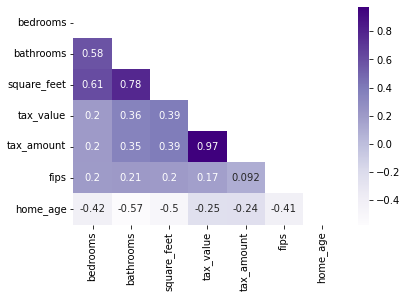

In [48]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr))
plt.show()

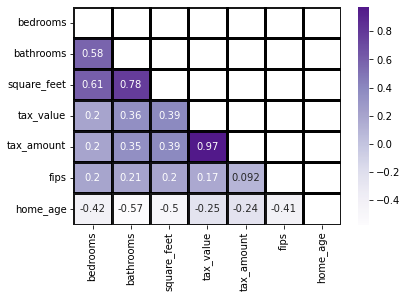

In [49]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()

# Testing Relationships

### Variance Inflation Factor

In [50]:
train.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips,county,home_age
1560492,3,2.0,1284,78502,1964,743.78,6059,Orange,53
453041,4,2.0,1694,341772,1961,3609.74,6111,Ventura,56


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
#Using all variables for this first
X = train[['bedrooms', 'bathrooms', 'square_feet', 'home_age', 'tax_amount', 'fips']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,bedrooms,29.854107
1,bathrooms,26.300326
2,square_feet,26.879583
3,home_age,12.475149
4,tax_amount,5.268436
5,fips,49.115155


In [61]:
#Trying VIF again with limited variables
X = train[['tax_amount','bathrooms', 'home_age']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,tax_amount,4.727010
1,bathrooms,5.924835
2,home_age,3.369302


### These three features seem the best at reducing multicolinearity

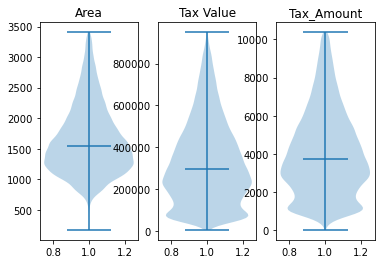

In [63]:
#Violin Plot
area = sample.square_feet
tax_value = sample.tax_value
tax_amount = sample.tax_amount

# Create figure with three axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(area, showmedians=True)
ax1.set_title('Area')

# Plot violin plot on axes 2
ax2.violinplot(tax_value, showmedians=True)
ax2.set_title('Tax Value')

# Plot violin plot on axes 3
ax3.violinplot(tax_amount, showmedians=True)
ax3.set_title('Tax_Amount')

plt.show()

## Bivariate analysis

In [ ]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=sample.drop(columns='fips_loc'),
            corner=True)
plt.show()

## Continuous vs. Continous

In [ ]:
#Scatter
sample.plot.scatter(x = 'tax_amount', y = 'tax_value')

## Discrete vs. Continuous

In [ ]:
sns.swarmplot(x='tax_amount', y='tax_value', data=sample)

### Area

In [ ]:
sample.head()

In [ ]:
sns.relplot(data=sample, x='tax_amount', y='tax_value')
plt.show()

In [ ]:
# I can really pop that line color if I want
sns.lmplot(data=sample, x='area', y='tax_value',
           line_kws={'color':'red'})
plt.show()

### Running Pearson's Correlation between Square Footage (Area) vs Tax Value

In [64]:
corr, p = stats.pearsonr(train.square_feet, train.tax_value)
corr, p

(0.4225197700315147, 0.0)

#### Significant Relationship

### Running Spearman's Correlation between Tax_amount vs Tax Value

In [65]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = stats.spearmanr(train.tax_amount, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9729682287033513
P-value: 0.0


#### Very strong relationship

### Running Spearman's Correlation between tax value vs home_age

In [70]:
### Running Spearman's Correlation between Val vs home_age
corr, p = stats.pearsonr(train.tax_value, train.home_age)
corr, p

(-0.24979823650972355, 0.0)

#### Significant relationship

## Running spearman's correlation between all variables

In [76]:
cols = train.columns.to_list()

In [77]:
cols

['bedrooms',
 'bathrooms',
 'square_feet',
 'tax_value',
 'year_built',
 'tax_amount',
 'fips',
 'county',
 'home_age']

In [78]:
cols.remove('year_built')
cols.remove('county')

In [79]:
cols

['bedrooms',
 'bathrooms',
 'square_feet',
 'tax_value',
 'tax_amount',
 'fips',
 'home_age']

In [80]:
for col in cols:
    r, p_value = stats.spearmanr(train['tax_value'], 
                                 train[col])
    print(f'Comparing tax_value with {col}')
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
    print('---------------------------\n')

Comparing tax_value with bedrooms
Correlation Coefficient: 0.1997282509064908
P-value: 0.0

---------------------------

Comparing tax_value with bathrooms
Correlation Coefficient: 0.35327920769275994
P-value: 0.0

---------------------------

Comparing tax_value with square_feet
Correlation Coefficient: 0.3914873817072303
P-value: 0.0

---------------------------

Comparing tax_value with tax_value
Correlation Coefficient: 1.0
P-value: 0.0

---------------------------

Comparing tax_value with tax_amount
Correlation Coefficient: 0.9729682287033514
P-value: 0.0

---------------------------

Comparing tax_value with fips
Correlation Coefficient: 0.17066134620683618
P-value: 0.0

---------------------------

Comparing tax_value with home_age
Correlation Coefficient: -0.24558584894924637
P-value: 0.0

---------------------------



In [81]:
for col in cols:
    for col2 in cols:
        r, p_value = stats.spearmanr(train[col], 
                                     train[col2])
        print(f'Comparing {col} with {col2}')
        print(f'Correlation Coefficient: {r}\nP-value: {p_value}\n')
        print('---------------------------\n')

Comparing bedrooms with bedrooms
Correlation Coefficient: 0.9999999999999998
P-value: 0.0

---------------------------

Comparing bedrooms with bathrooms
Correlation Coefficient: 0.5785128815009373
P-value: 0.0

---------------------------

Comparing bedrooms with square_feet
Correlation Coefficient: 0.6077962395168035
P-value: 0.0

---------------------------

Comparing bedrooms with tax_value
Correlation Coefficient: 0.19972825090649082
P-value: 0.0

---------------------------

Comparing bedrooms with tax_amount
Correlation Coefficient: 0.19964373792064075
P-value: 0.0

---------------------------

Comparing bedrooms with fips
Correlation Coefficient: 0.19146640872709678
P-value: 0.0

---------------------------

Comparing bedrooms with home_age
Correlation Coefficient: -0.41265688805278505
P-value: 0.0

---------------------------

Comparing bathrooms with bedrooms
Correlation Coefficient: 0.5785128815009373
P-value: 0.0

---------------------------

Comparing bathrooms with bathro

### Comparing Categorical and Categorical Variables

In [ ]:
train.info()

In [ ]:
#Running Chi-Square Test between bedrooms and bathrooms


In [ ]:
#Looking at Tax Value with FIPS data

In [ ]:
LA = train[train.fips_loc == 'Los Angeles, CA']
Ventura = train[train.fips_loc == 'Ventura, CA']
Orange = train[train.fips_loc == 'Orange, CA']

In [ ]:
print(f'LA Mean Tax Value is: {round(LA.tax_value.mean())}')
print(f'Ventura Mean Tax Value is: {round(Ventura.tax_value.mean())}')
print(f'Orange Mean Tax Value is: {round(Orange.tax_value.mean())}')